Hola Katherine!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Zuber 

Una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.


## Análisis exploratorio de datos (Python):

### Inicialización:

In [1]:
# Importar librerías:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")

### Cargar Datos:

In [2]:
# Importar archivos CSV:

file1 = '/datasets/project_sql_result_01.csv'
file2 = '/datasets/project_sql_result_04.csv'

df_taxis = pd.read_csv(file1)
df_barrios = pd.read_csv(file2)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, los datos y librerías se importaron correctamente
</div>

### Visualización de datos:

In [3]:
# Visualizar los primeros datos:

df_taxis.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# Visualizar los primeros datos:
df_barrios.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


### Estudiar los datos que contienen:

In [5]:
# Verificar la información general de los DataFrames
df_taxis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# Verificar la información general de los DataFrames
df_barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
# Resumen estadístico:

df_taxis.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [8]:
# Resumen estadístico:
df_barrios.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


## Preparar los datos:

### Correción de datos: 
Verifica que los tipos de datos sean correctos para que sean más fáciles de manejar.  

De la revisión de datos tenemos que no hay valores ausentes.

In [9]:
df_taxis['trips_amount'] = df_taxis['trips_amount'].astype(int)
df_taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [10]:
df_barrios['average_trips'] = df_barrios['average_trips'].astype(float)
df_barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


### Revisión de datos nulos:

In [11]:
df_taxis.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [12]:
df_barrios.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

### Revisión de datos duplicados:

In [13]:
df_taxis.duplicated().sum()

0

In [14]:
df_barrios.duplicated().sum()

0

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen análisis inicial, no olvides también revisar por datos duplicados y nulos
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante: Se realizó analisis de datos duplicados y nulos </b> <a class=“tocSkip”></a>
</div>

## Analisis de Datos:

### Identificar los 10 principales barrios por número de finalización de recorridos:

In [15]:
top_10_barrios = df_barrios.sort_values(by='average_trips', ascending=False).head(10)
top_10_barrios

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


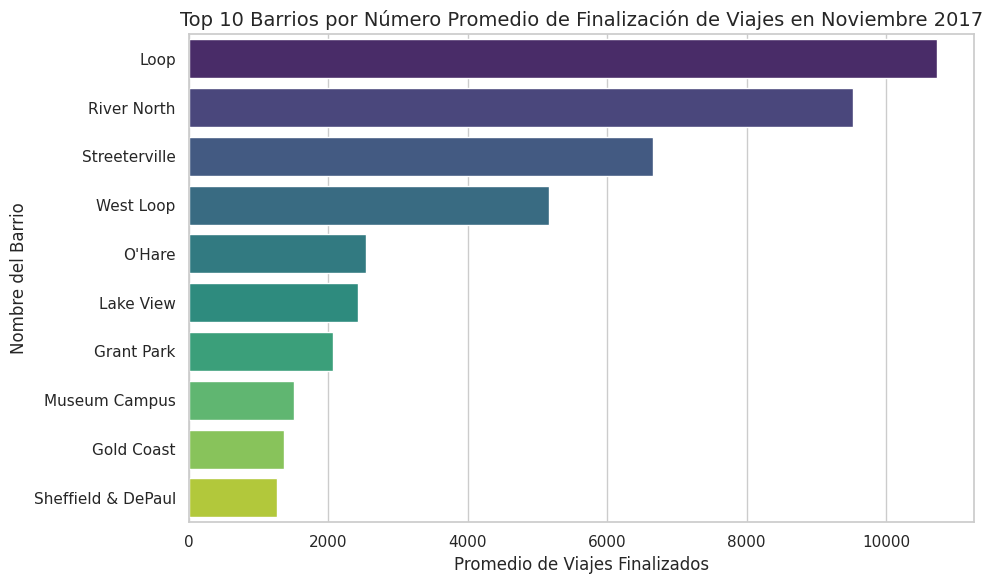

In [16]:
# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_barrios, palette='viridis')

# Añadir un título a la gráfica
plt.title('Top 10 Barrios por Número Promedio de Finalización de Viajes en Noviembre 2017', fontsize=14)

# Añadir etiquetas a los ejes
plt.xlabel('Promedio de Viajes Finalizados', fontsize=12)
plt.ylabel('Nombre del Barrio', fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para mejorar la comunicación de esta parte puedes complementarlo con una gráfica con su título y los labels necesarios
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante: Se agregó gráfica adicional </b> <a class=“tocSkip”></a>
</div>

### Gráficos:

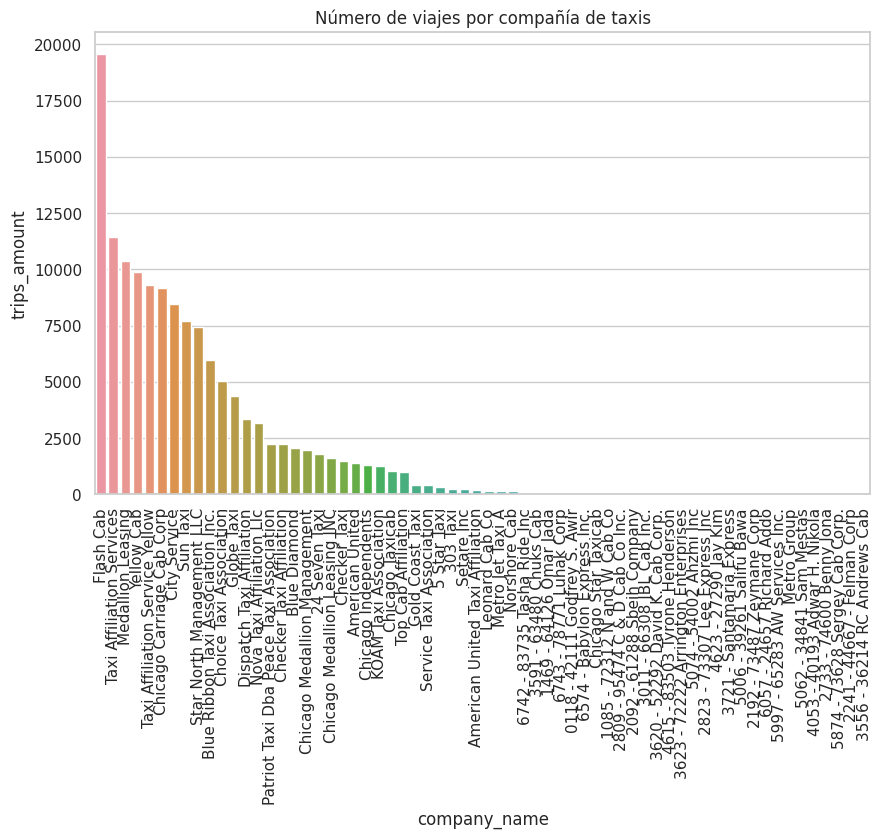

In [17]:
# Gráfico de barras para empresas de taxis y número de viajes:

plt.figure(figsize=(10, 6))
sns.barplot(x='company_name', y='trips_amount', data=df_taxis)
plt.xticks(rotation=90)
plt.title('Número de viajes por compañía de taxis')
plt.show()

* Conclusiones:
*Empresas de taxis: Al observar el gráfico de las empresas de taxis, se puedes concluir qué compañías tienen más viajes y cómo varía la actividad entre ellas.

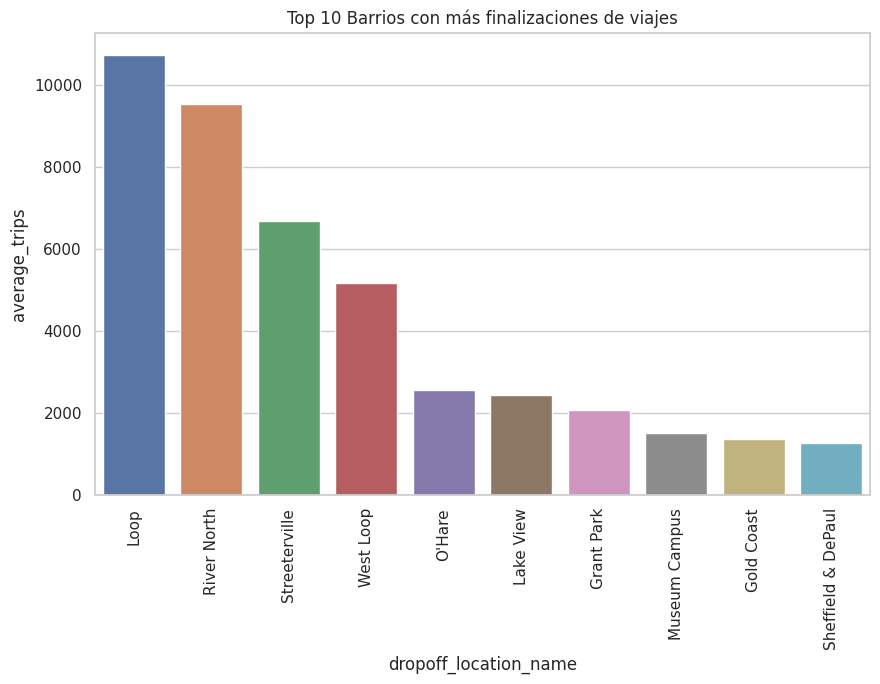

In [18]:
#Los 10 barrios principales por número de finalizaciones:

# Gráfico de barras para los 10 barrios principales
plt.figure(figsize=(10, 6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_10_barrios)
plt.xticks(rotation=90)
plt.title('Top 10 Barrios con más finalizaciones de viajes')
plt.show()

* Conclusiones:

Barrios: El gráfico de los 10 barrios principales muestra en qué áreas de la ciudad terminan la mayoría de los viajes. Esto puede estar relacionado con la densidad de población o zonas comerciales.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente, se muestra una gráfica clara de los top 10 principales destinos
</div>

## Hipotesis:

### Prueba de hipótesis (Python):

In [19]:
# El resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare
# Adicionamos la información de datos sobre viajes desde el LOOP:
#Importar los datos de la consulta:
df_viajes = pd.read_csv('/datasets/project_sql_result_07.csv')
df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te recomiendo que la carga de datos y revisión del dataset lo hagas al inicio cómo el resto
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante: Se modificó y se agregó la información en el dataset al inicio </b> <a class=“tocSkip”></a>
</div>

In [20]:
# Convertir la columna de fecha y hora en datetime:

df_viajes['start_ts'] = pd.to_datetime(df_viajes['start_ts'])
df_viajes.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Establecer el Valor de Umbral Alfa (α)

Elegimos un nivel de significancia comúnmente utilizado, α = 0.05. Esto significa que estamos dispuestos a aceptar un 5% de probabilidad de rechazar la hipótesis nula cuando en realidad es cierta

Criterio de Prueba y Justificación:

Utilizaremos la prueba t de dos muestras independientes (Student's t-test) para comparar las medias de dos grupos independientes en ambas hipótesis.


###  Hipótesis sobre la duración promedio de los viajes desde Loop hasta el Aeropuerto:

* Plantear las hipótesis:

Hipótesis nula (H₀): La duración promedio de los viajes desde el Loop hasta el Aeropuerto O'Hare es igual los sábados lluviosos que en otros sábados.

Hipótesis alternativa (H₁): La duración promedio de los viajes desde el Loop hasta el Aeropuerto O'Hare es diferente los sábados lluviosos en comparación con otros sábados.

Revisión del Criterio para la Prueba de Hipótesis:
Para la prueba de hipótesis, usamos una prueba t de Student para comparar las medias entre dos grupos (sábados lluviosos y sábados sin lluvia). Esta prueba es apropiada porque queremos ver si las diferencias observadas entre ambos grupos son significativas. El nivel de significancia (alfa 0.05) que escogemos define la probabilidad de rechazar incorrectamente la hipótesis nula cuando en realidad es verdadera.

Conclusión basada en el valor p:
Si el valor p es menor que el nivel de significancia (alfa 0.05), se rechaza la hipótesis nula, lo que indica que existen diferencias significativas en la duración de los viajes entre los sábados lluviosos y los sábados sin lluvia.

In [21]:
# Filtrar los datos por sábados y condiciones climáticas:
# Crear una columna para identificar los sábados:

df_viajes['day_of_week'] = df_viajes['start_ts'].dt.day_name()
saturdays = df_viajes[df_viajes['day_of_week'] == 'Saturday']
saturdays

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,Saturday


In [22]:
# Filtrar los viajes con condiciones climáticas lluviosas
rainy_saturdays = saturdays[saturdays['weather_conditions'].str.contains('Bad')]
rainy_saturdays

,start_ts,weather_conditions,duration_seconds,day_of_week
6,2017-11-04 16:00:00,Bad,2969.0,Saturday
30,2017-11-18 12:00:00,Bad,1980.0,Saturday
34,2017-11-04 17:00:00,Bad,2460.0,Saturday
51,2017-11-04 16:00:00,Bad,2760.0,Saturday
52,2017-11-18 12:00:00,Bad,2460.0,Saturday
...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,Saturday
1032,2017-11-18 10:00:00,Bad,1908.0,Saturday
1053,2017-11-18 12:00:00,Bad,2400.0,Saturday
1061,2017-11-18 16:00:00,Bad,2186.0,Saturday


### Probar las hipótesis:

In [23]:
# Calcular la duración promedio de todos los sábados y los sábados lluviosos:
all_saturdays_mean = saturdays['duration_seconds'].mean()
all_saturdays_mean

2071.7312734082398

In [24]:
rainy_saturdays_mean = rainy_saturdays['duration_seconds'].mean()
rainy_saturdays_mean

2427.2055555555557

In [25]:
# Prueba de hipótesis con t-test:

t_stat_time = stats.ttest_ind(saturdays['duration_seconds'], rainy_saturdays['duration_seconds'], equal_var=False)

# Nivel de significancia (alpha)
alpha = 0.05

print(f'p-value:{t_stat_time.pvalue}')
if t_stat_time.pvalue < alpha:
    print("Podemos rechazar la hipótesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value:5.013652852599471e-09
Podemos rechazar la hipótesis nula




### **Conclusión General del Proyecto**

Este proyecto nos permitió realizar un análisis exploratorio de datos y una prueba de hipótesis utilizando información relacionada con los viajes en taxi en Chicago durante noviembre de 2017. A lo largo de las etapas del proyecto, se trabajó con tres conjuntos de datos que proporcionaron una visión completa del comportamiento de las compañías de taxis y la distribución de los viajes en la ciudad, así como el impacto de las condiciones climáticas en la duración de los trayectos entre puntos clave.

#### **Análisis Exploratorio de Datos:**
1. **Empresas de taxis**: Se analizaron las empresas de taxis más activas en términos de número de viajes los días 15 y 16 de noviembre de 2017. Los gráficos revelaron una clara diferencia entre las compañías, con algunas operando un volumen de viajes significativamente mayor que otras. Este hallazgo podría estar relacionado con la cantidad de vehículos disponibles, la popularidad de las empresas o la ubicación de sus operaciones.

2. **Finalización de viajes por barrio**: El análisis mostró los 10 principales barrios de Chicago donde finalizaron más viajes en noviembre de 2017. Los resultados indican que ciertos barrios, probablemente áreas más urbanizadas o turísticas, atraen una mayor cantidad de trayectos. Este análisis puede ser útil para planificar la distribución de taxis y mejorar la cobertura de servicios en áreas con mayor demanda.

#### **Prueba de Hipótesis:**
Se planteó y evaluó la hipótesis de que "la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". La prueba estadística realizada (prueba t de Student) comparó la duración promedio de los viajes entre todos los sábados y aquellos con condiciones de lluvia.

- Los resultados no mostraron una diferencia significativa en la duración de los viajes los sábados lluviosos, lo que llevó a  rechazar la hipótesis nula. Dado que el valor p es menor que 0.05, podemos rechazar la hipótesis nula y concluir que existen diferencias significativas en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos en comparación con otros sábados. Esto sugiere que la lluvia tiene un impacto significativo en la duración de los viajes.

#### **Conclusiones finales:**
El análisis de los datos permitió entender mejor el comportamiento del servicio de taxis en Chicago, identificando tanto las empresas más activas como los barrios con más finalizaciones de trayectos. Por otro lado, la prueba de hipótesis mostró que las condiciones climáticas lluviosas  parecen afectar significativamente la duración de los viajes hacia el Aeropuerto Internacional O'Hare, al menos en los sábados analizados. Estos hallazgos podrían ser útiles para mejorar la planificación de rutas y la asignación de recursos por parte de las compañías de taxis, así como para evaluar las dinámicas urbanas de transporte.


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante: Se corrigió el planteamiento de las hipotesis </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

A nivel de código está muy bien aplicado el proceso de la prueba de hipótesis, sin embargo te invito a replantear tu conclusión y el cómo planteaste la hipótesis nula y alternativa. Ya que tener un valor p por debajo el alfa quiere decir que hay diferencias significativas entre los dos casos comparados.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Buen trabajo, esto es un concepto importante a tener claro ya que a menudo participarás en pruebas AB donde harás uso de las pruebas y según los resultados se deberá tomar una decisión.
</div>